<center>
    <H1> CERVICALCANCER PREDICTION PROJECT</H1> 
    <h2>Data Cleaning</h2>
    <hr>
</center>

## Setting Up, Basic Observation on the Dataset

In [2]:
# importing basic libraries
from santa_modelling import np, pd, plt, sns, setJupyterNotebook, title
from santa_modelling import Explore,Split,OHE,Balance,SetIndex, FeatureScale, FeatureScaleAll
from santa_modelling import ClassificationModelDictionary, RunAll,Classify
import santa_modelling
#print(dir(santa_modelling))
setJupyterNotebook()

In [40]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
try:
    df = pd.read_csv('risk_factors_cervical_cancer.csv', index=1)
except: 
    df = pd.read_csv(url)
    df.to_csv('risk_factors_cervical_cancer.csv')

In [41]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [43]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [44]:
target = 'Biopsy'

In [45]:
## replace ? with NaN
df = df.replace('?', np.NaN)

## Treating Null values

### Checking Null Values

TotalNullValues 3622


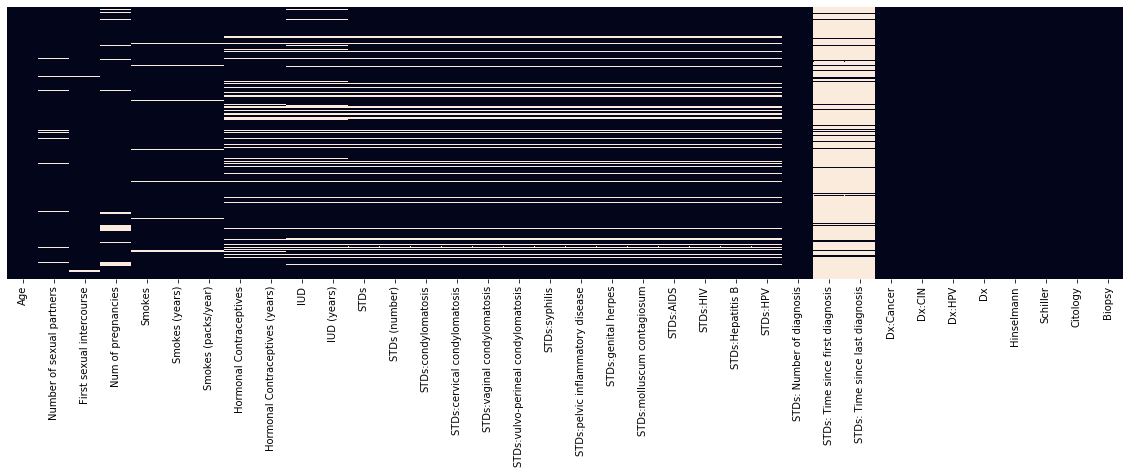

In [46]:
plt.figure(figsize=(20,5));sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
print('TotalNullValues',df.isnull().sum().sum())

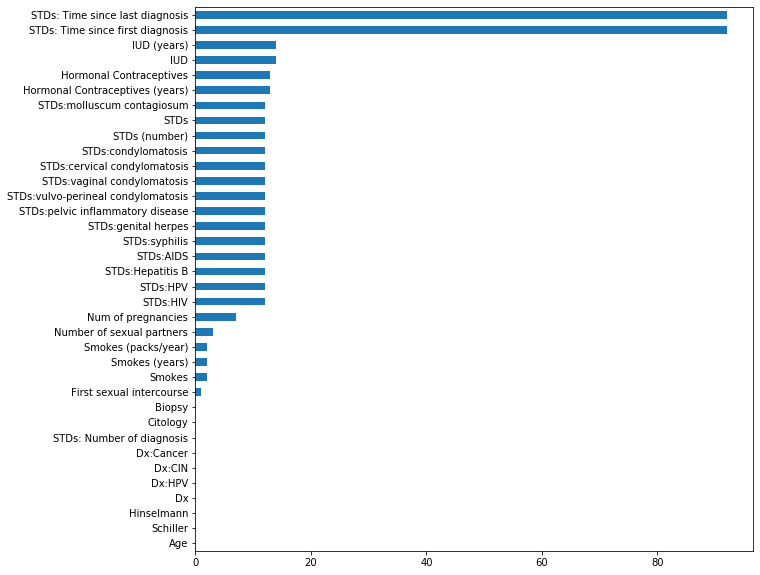

In [47]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

In [48]:
null_list = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
print(null_list)

STDs: Time since last diagnosis      91.725
STDs: Time since first diagnosis     91.725
IUD (years)                          13.636
IUD                                  13.636
Hormonal Contraceptives              12.587
Hormonal Contraceptives (years)      12.587
STDs:molluscum contagiosum           12.238
STDs                                 12.238
STDs (number)                        12.238
STDs:condylomatosis                  12.238
STDs:cervical condylomatosis         12.238
STDs:vaginal condylomatosis          12.238
STDs:vulvo-perineal condylomatosis   12.238
STDs:pelvic inflammatory disease     12.238
STDs:genital herpes                  12.238
STDs:syphilis                        12.238
STDs:AIDS                            12.238
STDs:Hepatitis B                     12.238
STDs:HPV                             12.238
STDs:HIV                             12.238
Num of pregnancies                    6.527
Number of sexual partners             3.030
Smokes (packs/year)             

### Removing Columns with above 90 % of null values

In [49]:
null_list[null_list>90]

STDs: Time since last diagnosis    91.725
STDs: Time since first diagnosis   91.725
dtype: float64

In [50]:
df = df.drop(null_list[null_list>90].index,axis=1)
null_list=null_list.drop(null_list[null_list>90].index)

In [59]:
### Checking other null values

In [60]:
null_list

IUD (years)                          13.636
IUD                                  13.636
Hormonal Contraceptives              12.587
Hormonal Contraceptives (years)      12.587
STDs:molluscum contagiosum           12.238
STDs                                 12.238
STDs (number)                        12.238
STDs:condylomatosis                  12.238
STDs:cervical condylomatosis         12.238
STDs:vaginal condylomatosis          12.238
STDs:vulvo-perineal condylomatosis   12.238
STDs:pelvic inflammatory disease     12.238
STDs:genital herpes                  12.238
STDs:syphilis                        12.238
STDs:AIDS                            12.238
STDs:Hepatitis B                     12.238
STDs:HPV                             12.238
STDs:HIV                             12.238
Num of pregnancies                    6.527
Number of sexual partners             3.030
Smokes (packs/year)                   1.515
Smokes (years)                        1.515
Smokes                          

In [61]:
df.dropna().to_csv('dropna.csv')

In [53]:
df.dropna().shape, df.shape

((668, 34), (858, 34))